In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%load_ext autoreload
%autoreload 2

sns.set_theme()

from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

## Read data

In [2]:
sleeping_thresholds = [50, 100, 500, 1000] #5000, 10000, 20000] # 40000, 50000, 100000]
multipliers = [1, 1.03125, 1.0625, 1.125, 1.25, 1.5, 2]

df = None

for mp in multipliers:
    for st in sleeping_thresholds:
        filename = '29-06-2022/parameters-new-algorithm-1-threads-{}-us-{}.csv'.format(st, mp)
        new_df = pd.read_csv(filename)
        new_df['sleeping_threshold_us'] = st
        new_df['multiplier'] = mp
        df = pd.concat([df, new_df], ignore_index = True)
        
df.head()

,name,machine_id,threads,cpu_time_us,wall_clock_time_us,package_energy,core_energy,sleeping_threshold_us,multiplier
0,MergeSort,dahu-7.grenoble.grid5000.fr,32,511080,15121,1400265,123042,50,1.0
1,MergeSort,dahu-7.grenoble.grid5000.fr,32,387462,15485,1373043,116189,50,1.0
2,MergeSort,dahu-7.grenoble.grid5000.fr,32,510531,14541,1389400,107620,50,1.0
3,MergeSort,dahu-7.grenoble.grid5000.fr,32,510804,14832,1375851,115041,50,1.0
4,MergeSort,dahu-7.grenoble.grid5000.fr,32,511048,15066,1400143,123211,50,1.0


## Plot wallclock time

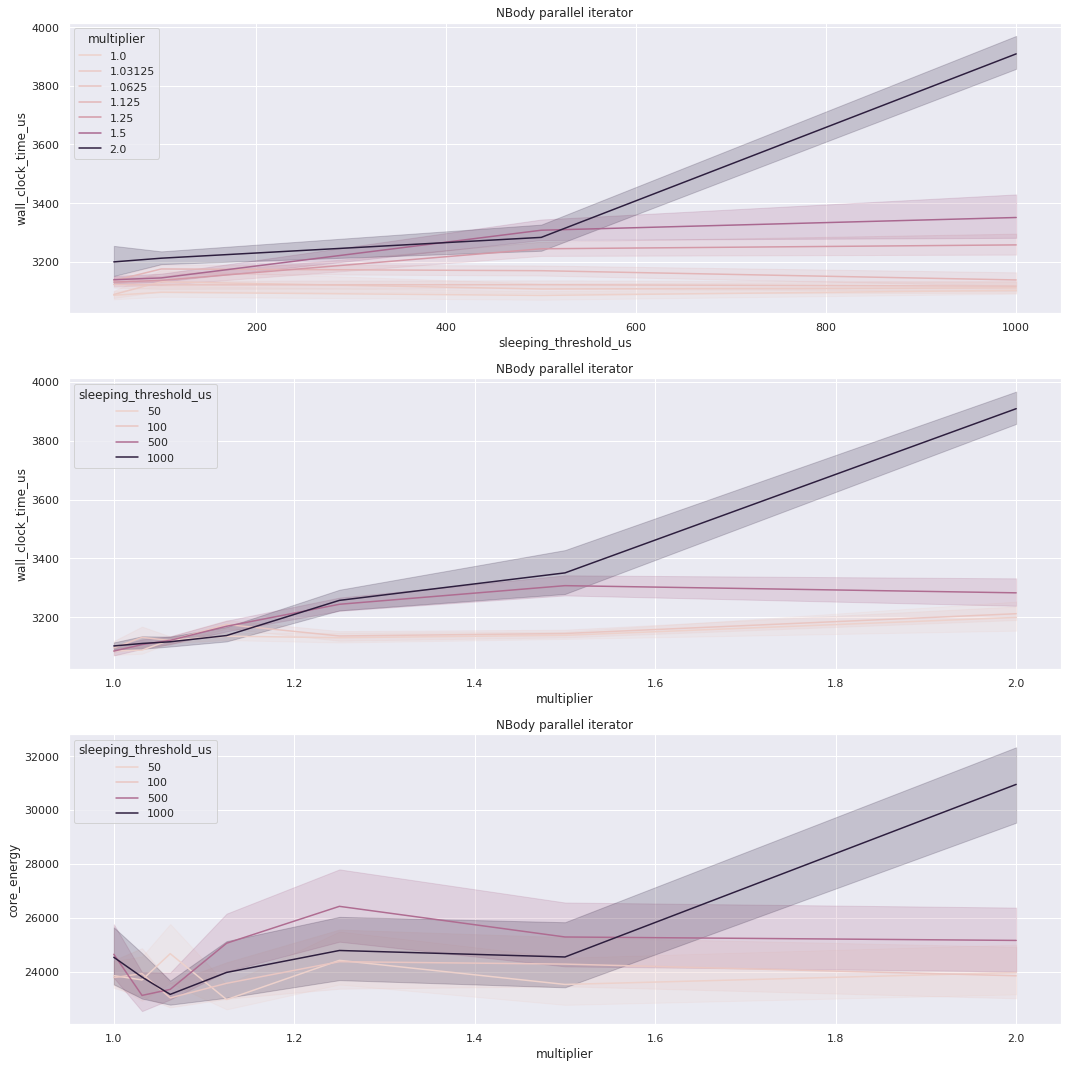

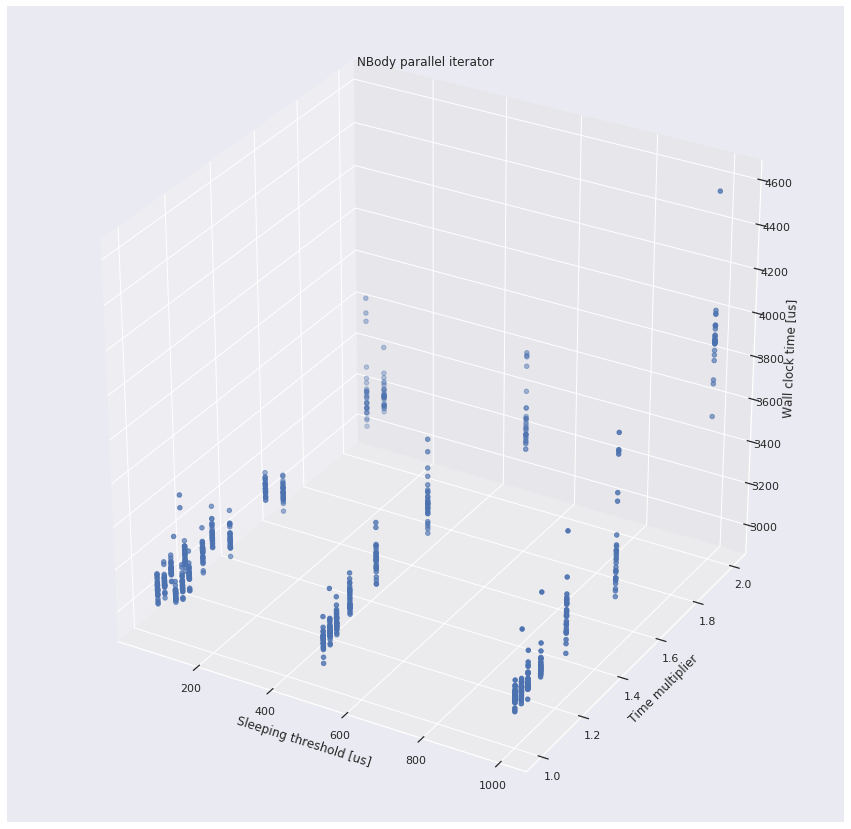

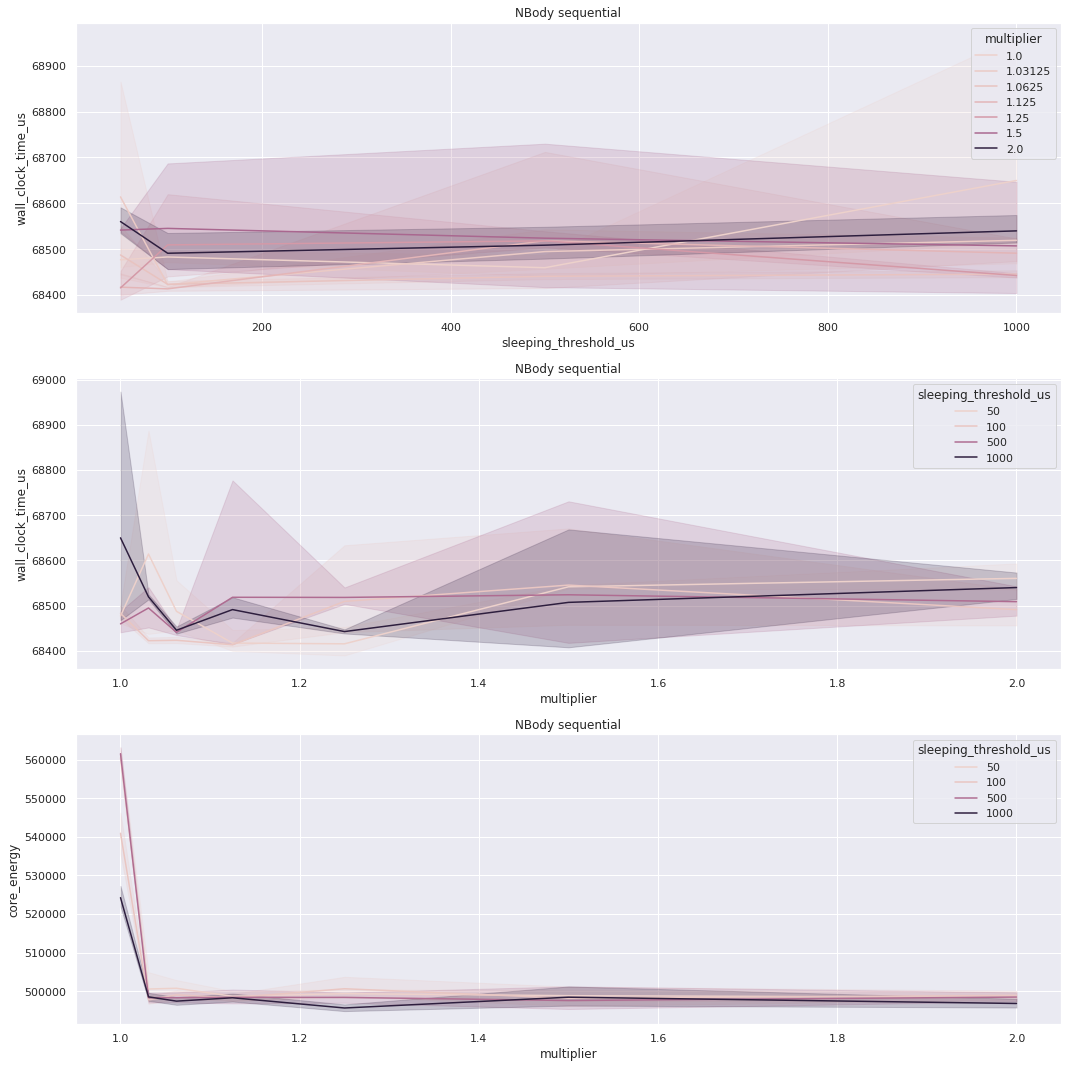

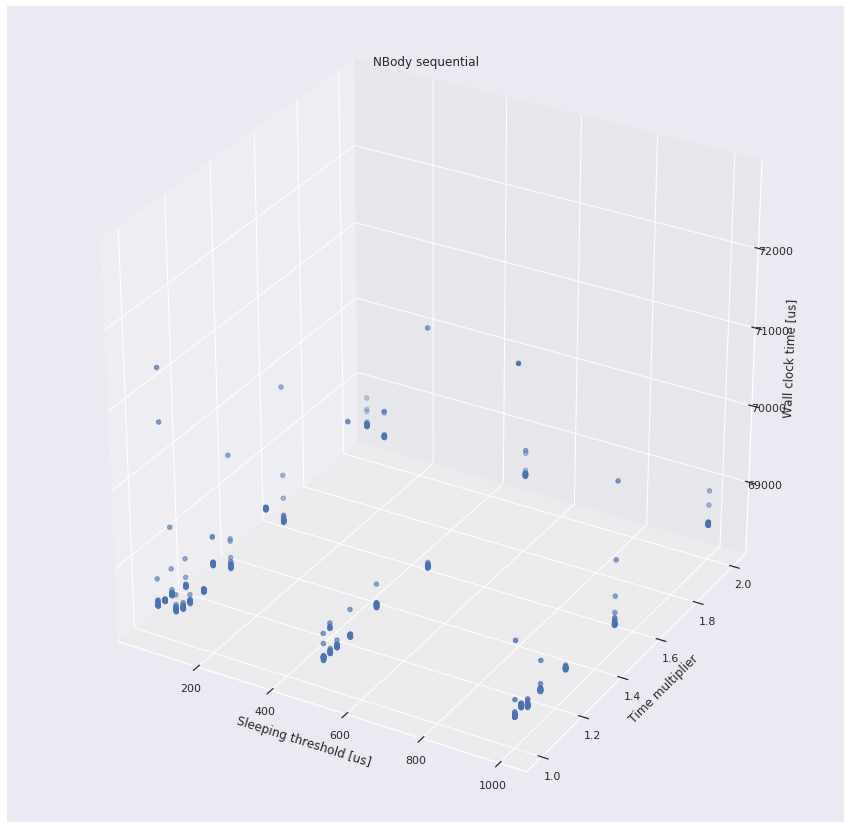

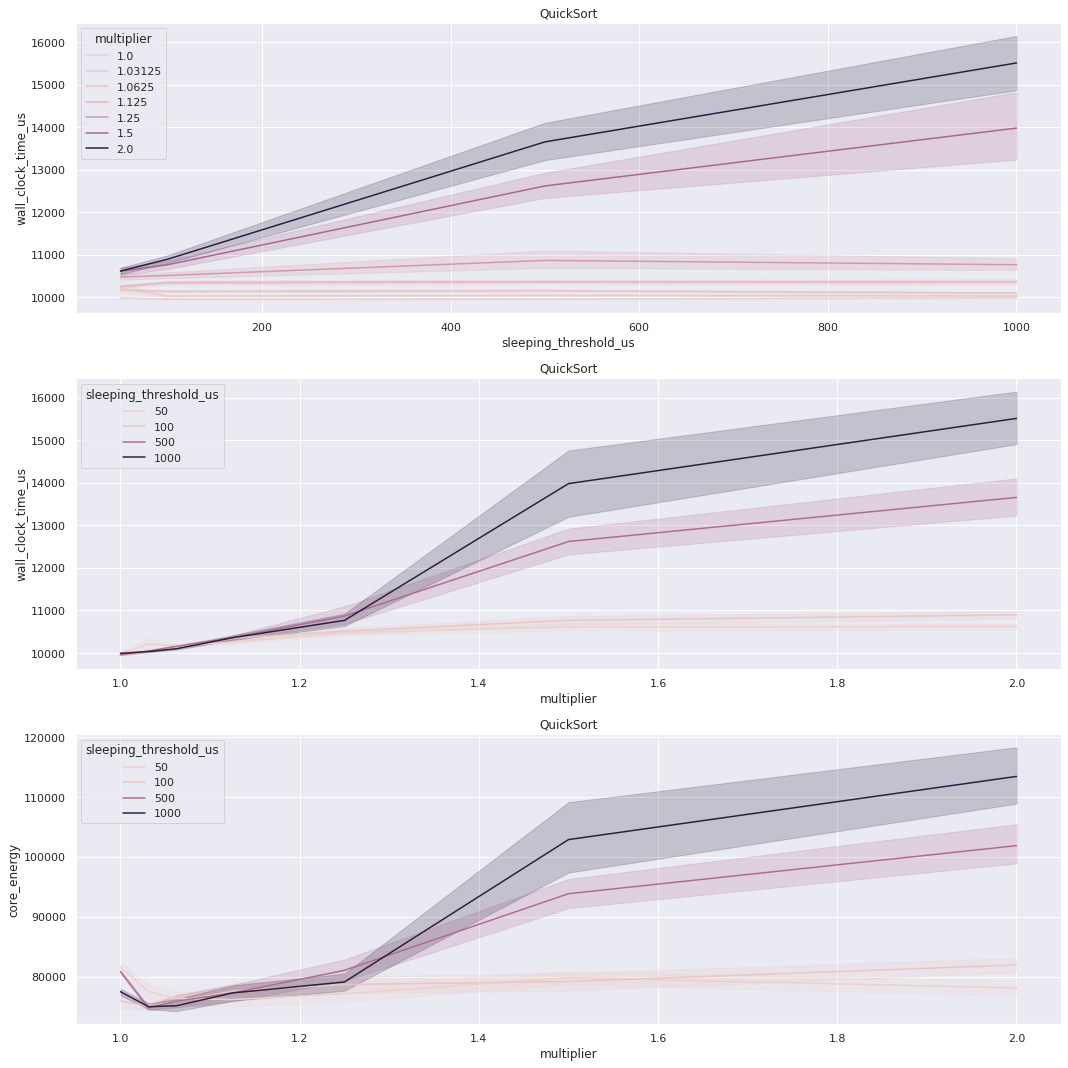

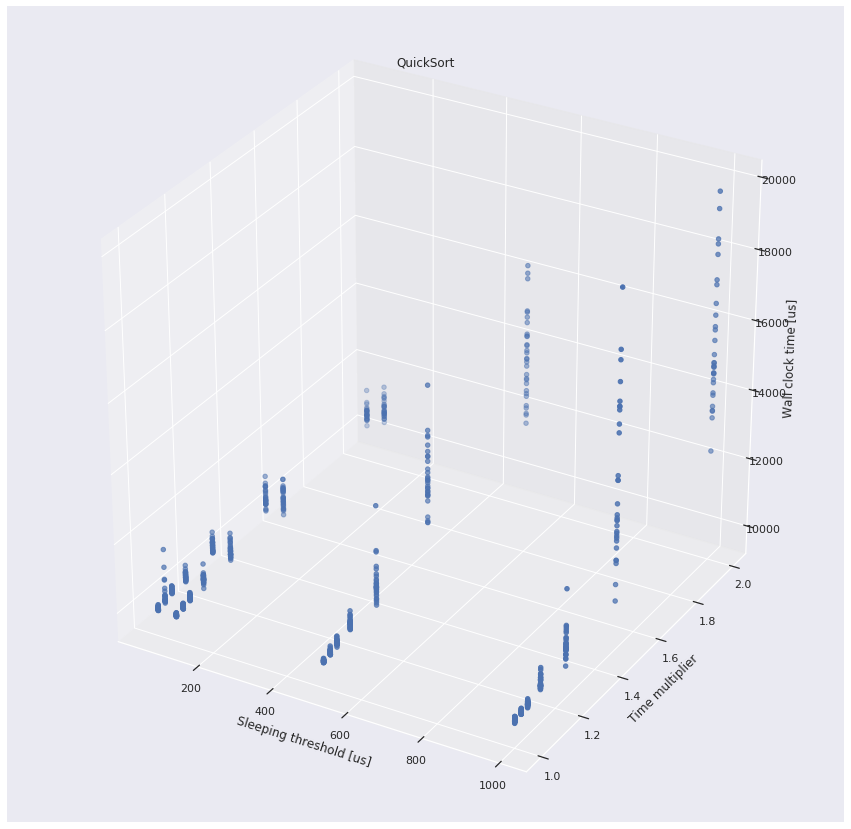

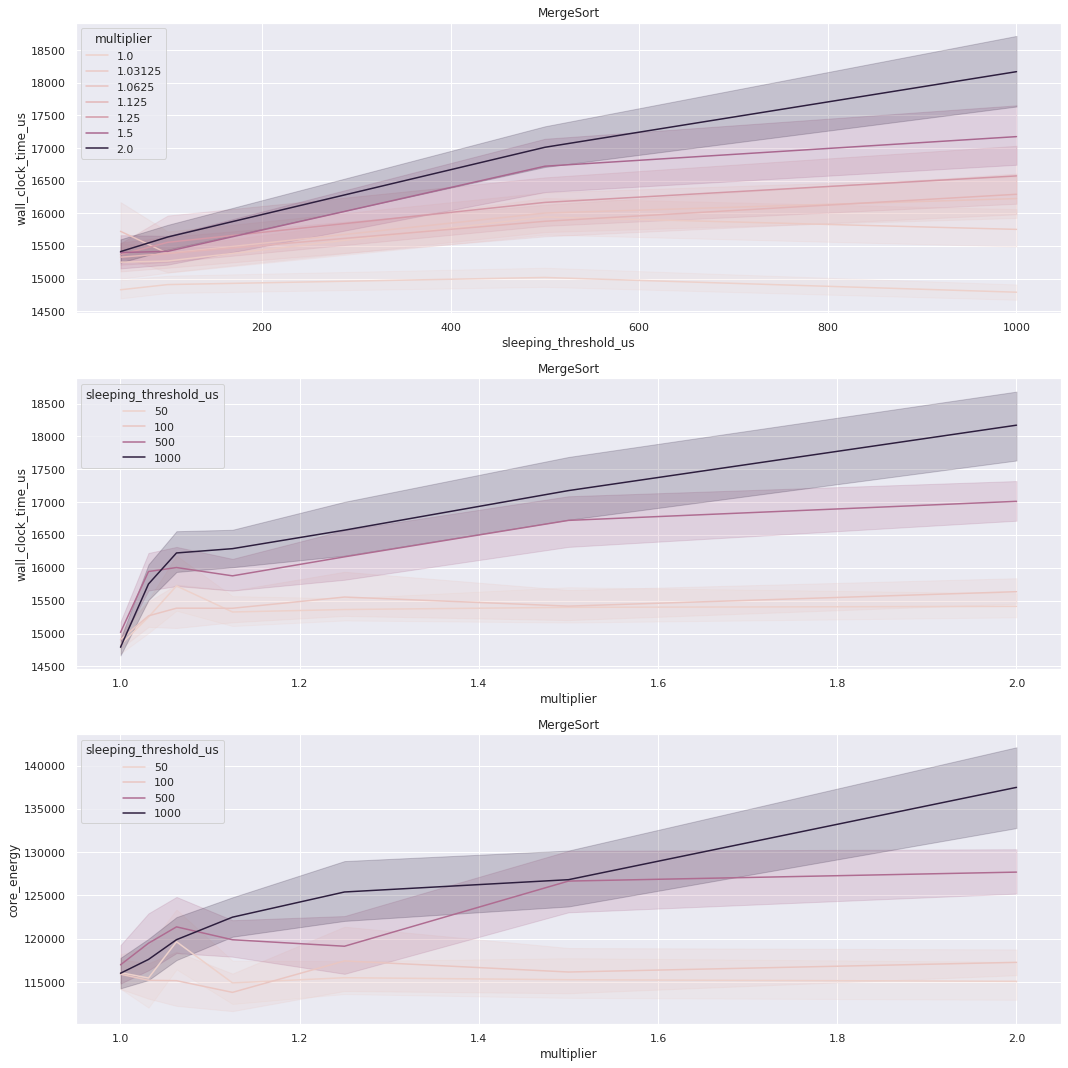

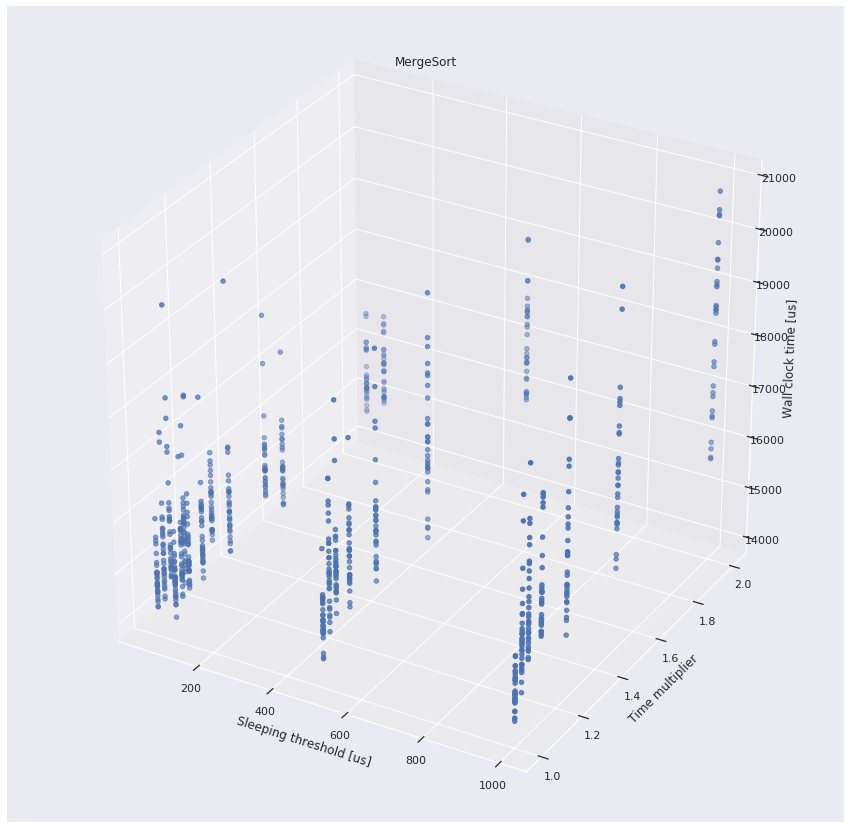

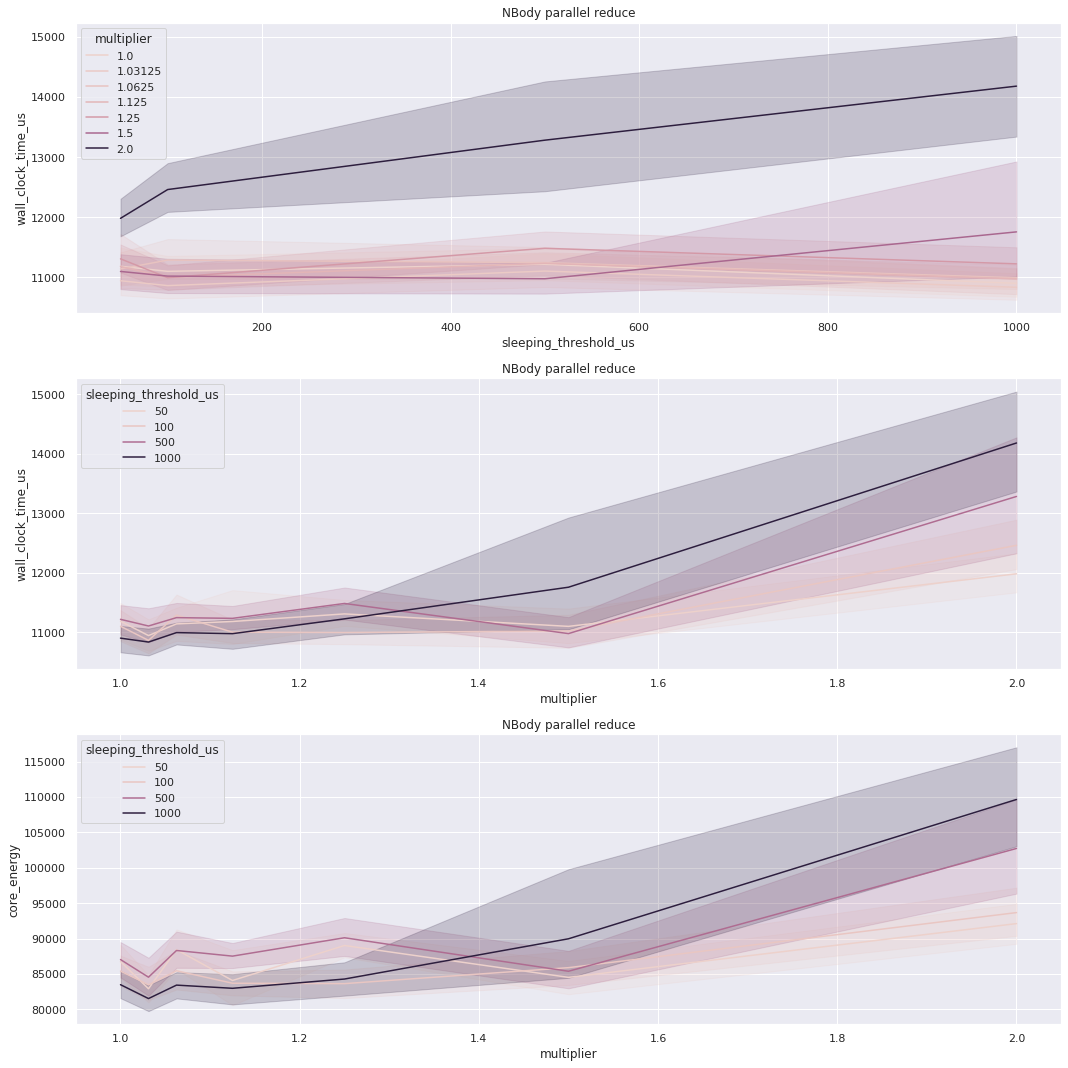

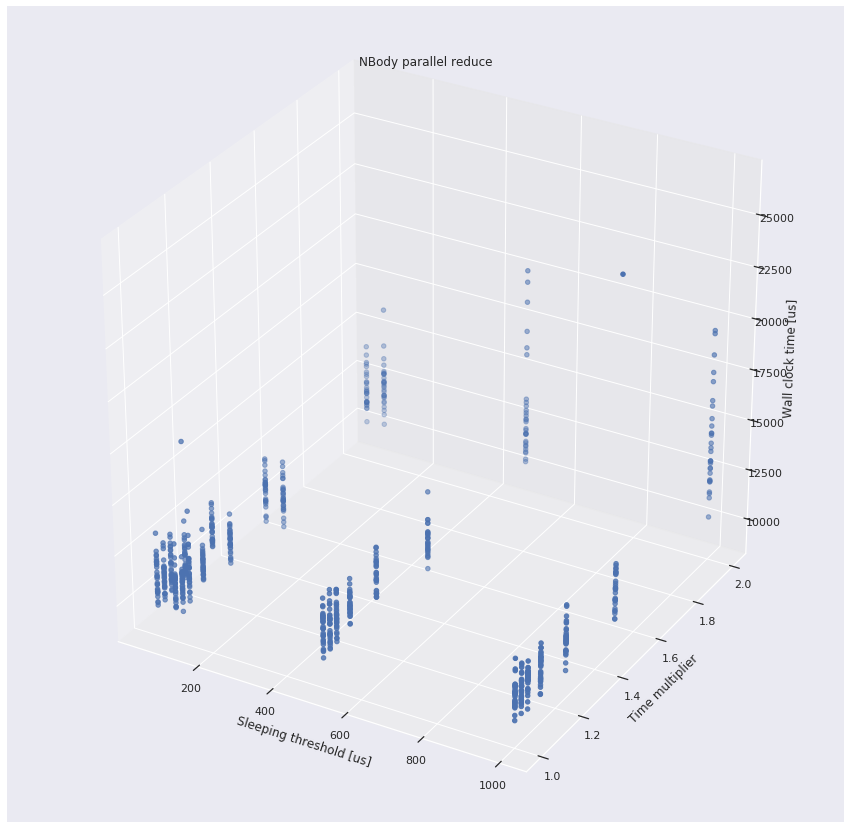

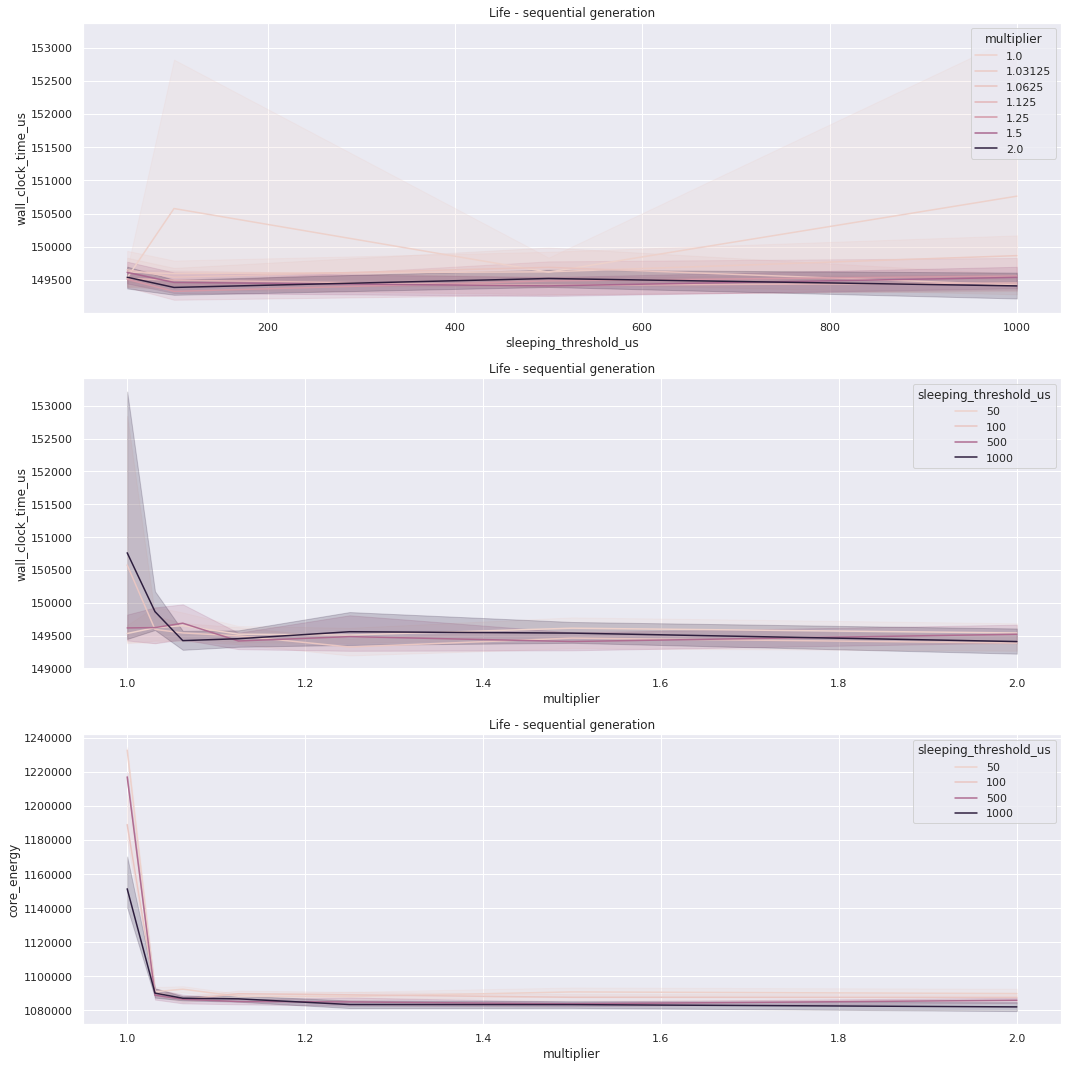

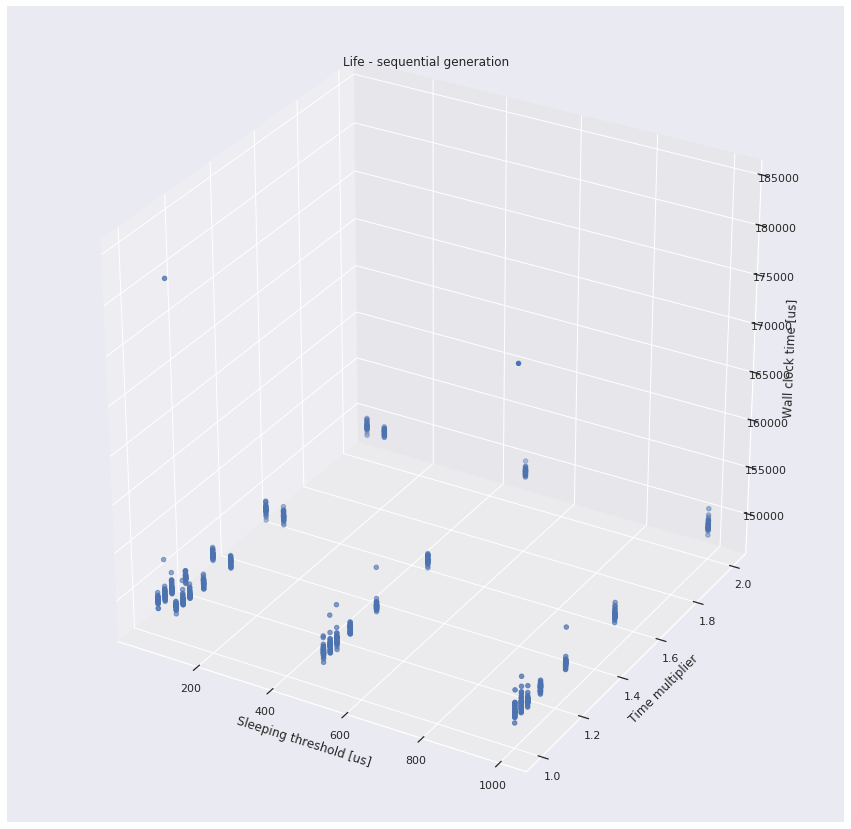

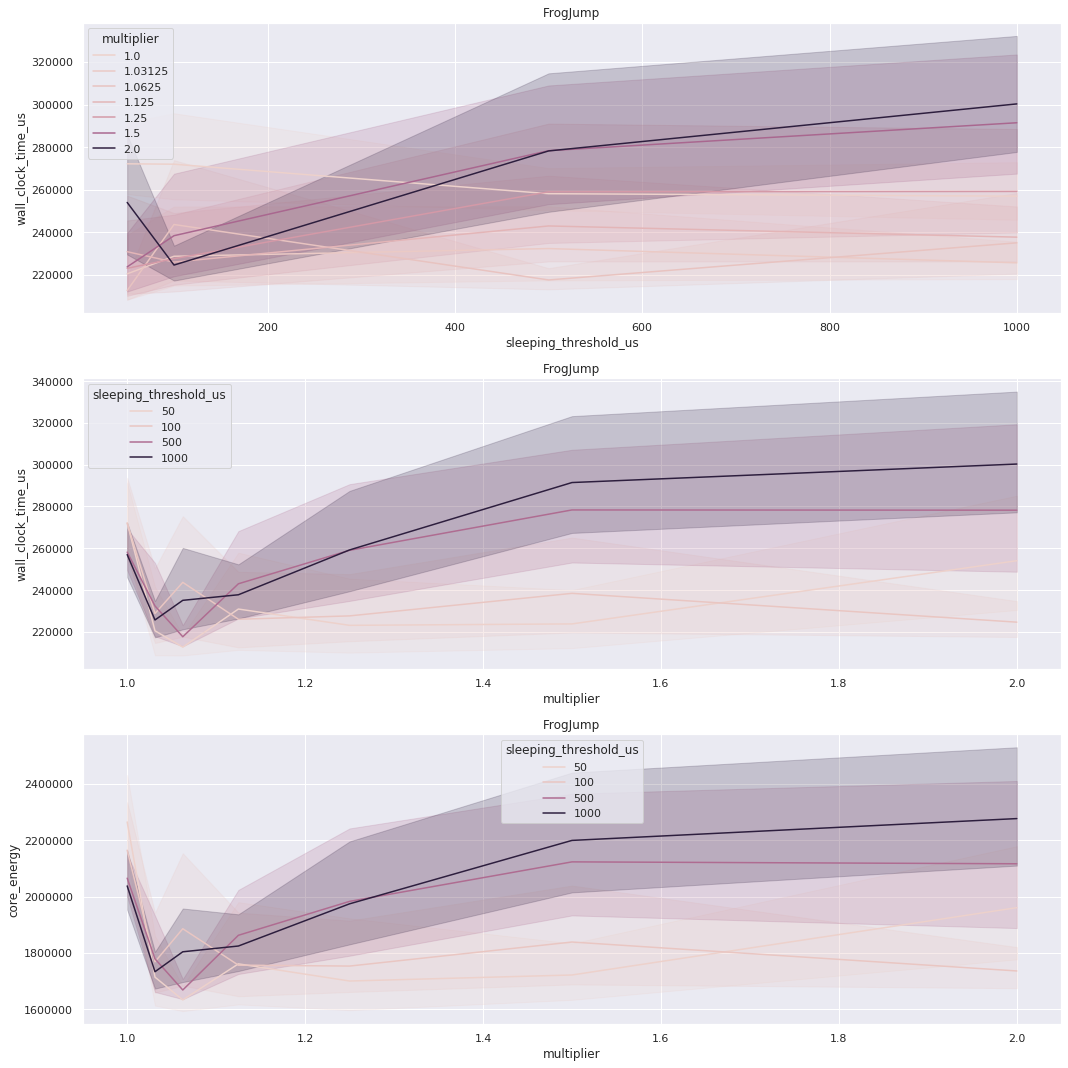

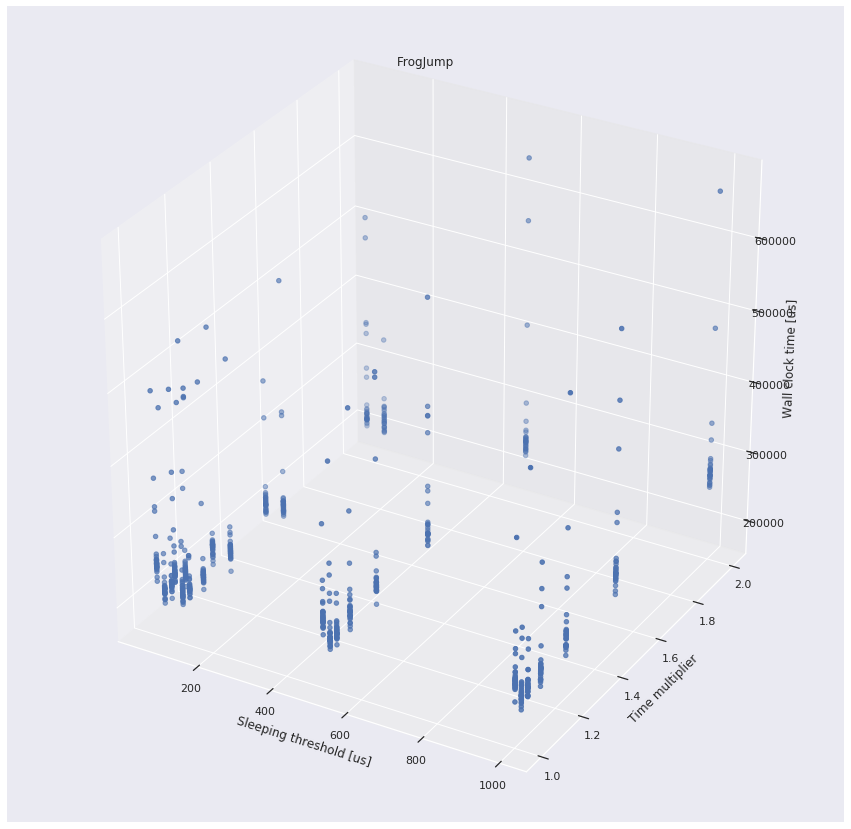

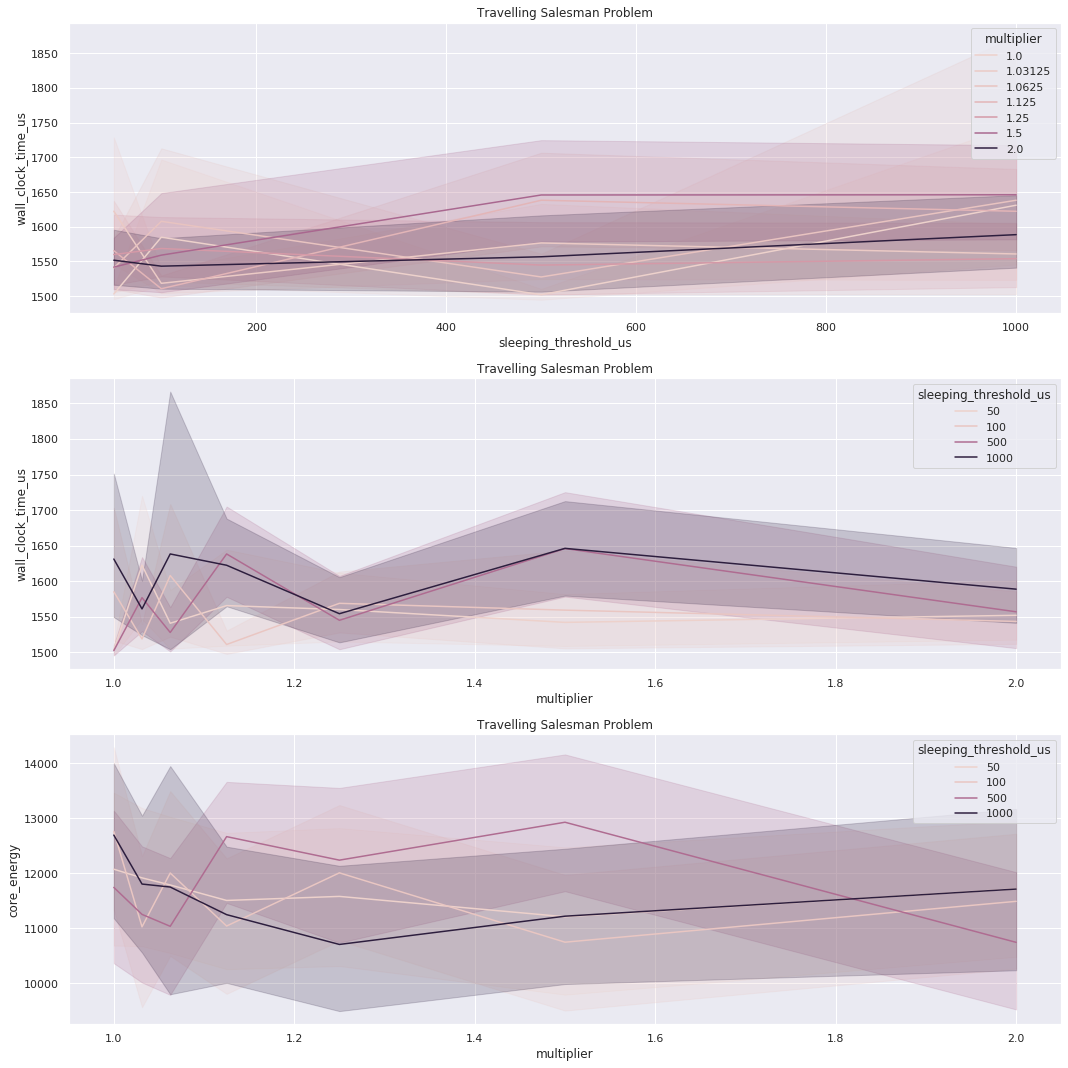

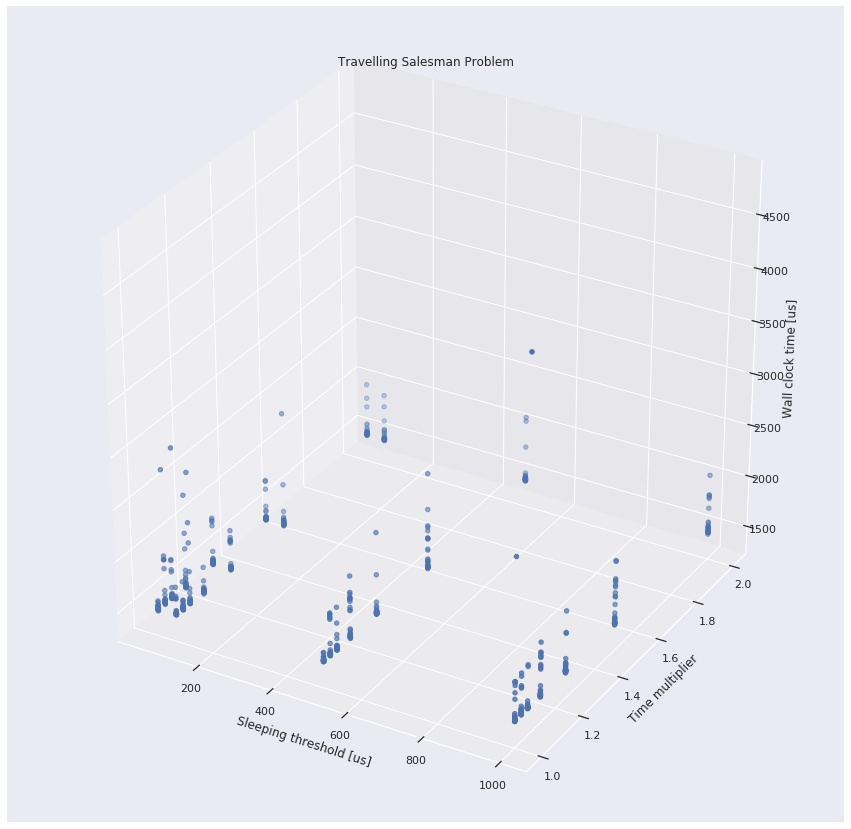

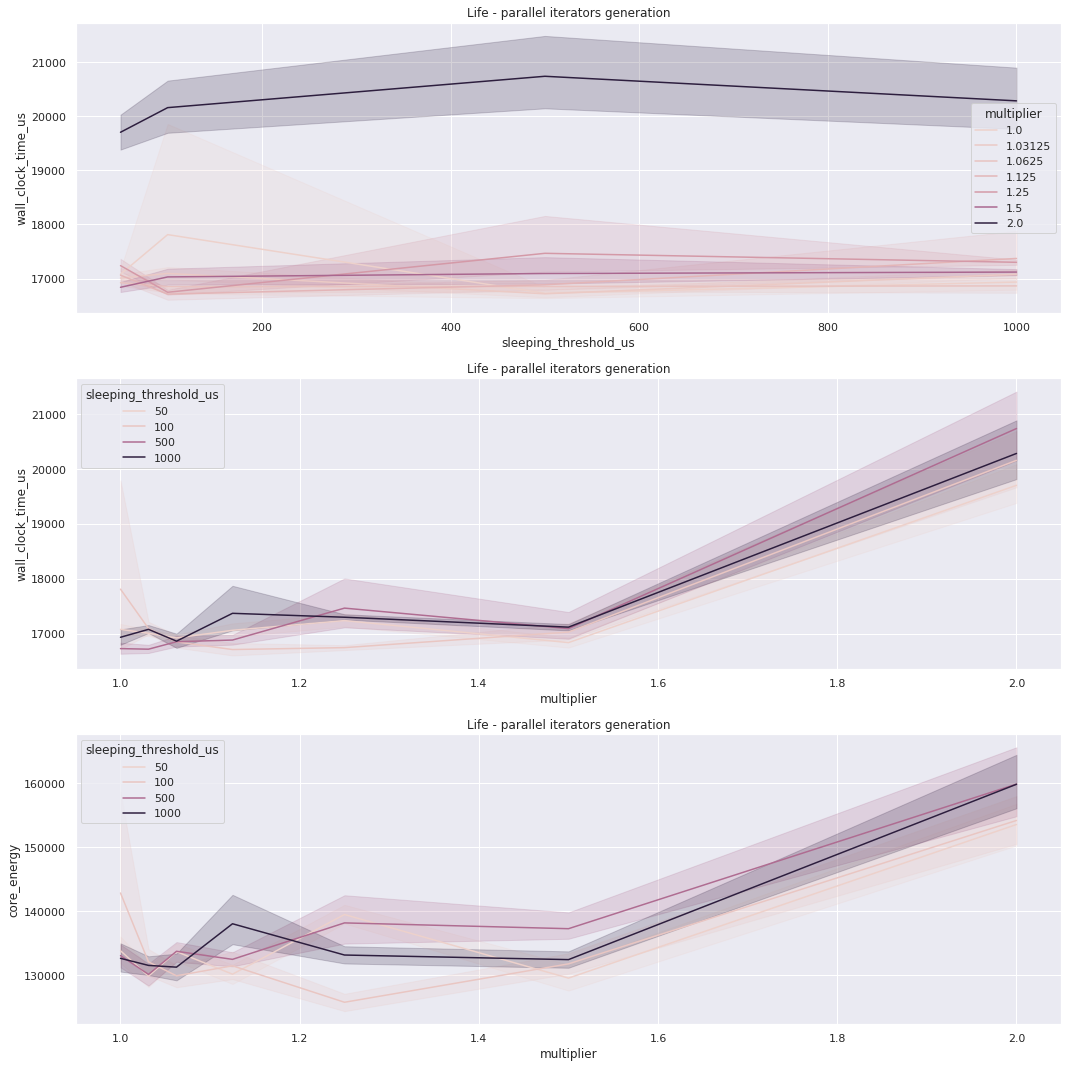

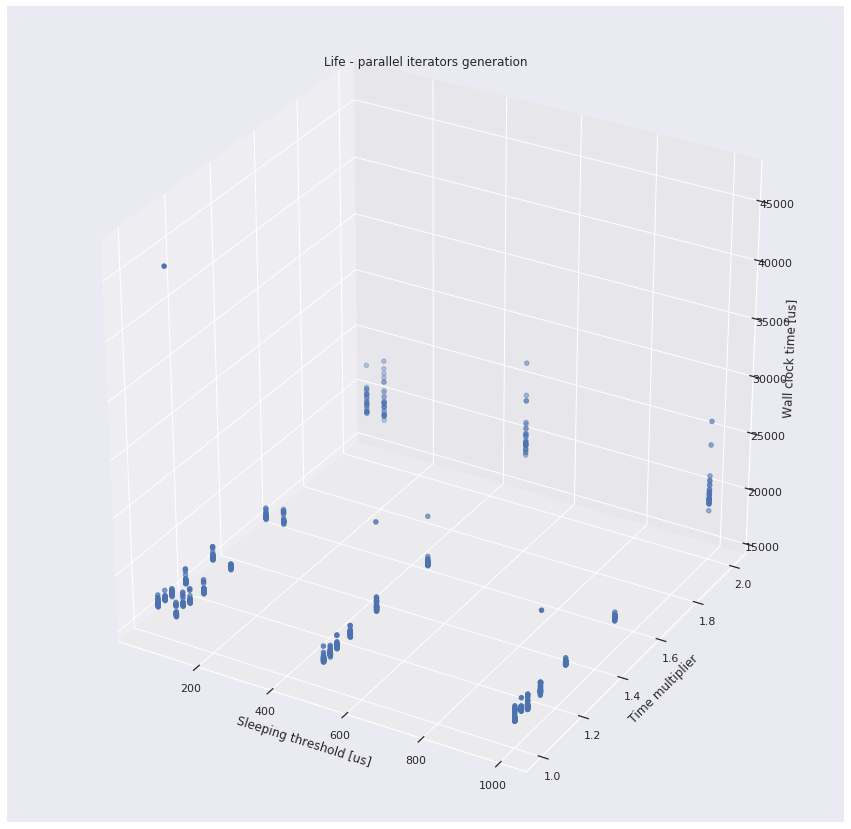

In [3]:
algorithms = set(df['name'])

for algorithm in algorithms:
    algorithm_df = df[df['name'] == algorithm]

    # wall clock time by sleeping threshold
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(3, 1, 1)
    
    sns.lineplot(x='sleeping_threshold_us', 
                 y='wall_clock_time_us',
                 hue='multiplier',
                 data=algorithm_df,
                 ax=ax,
                 legend='full')
                 #ci=None)
    ax.set_title(algorithm)
    
    ax = fig.add_subplot(3, 1, 2)
    
    sns.lineplot(x='multiplier', 
                 y='wall_clock_time_us',
                 hue='sleeping_threshold_us',
                 data=algorithm_df,
                 ax=ax,
                 legend='full')
                 #ci=None)
    ax.set_title(algorithm)
    
    ax = fig.add_subplot(3, 1, 3)
    
    sns.lineplot(x='multiplier', 
                 y='core_energy',
                 hue='sleeping_threshold_us',
                 data=algorithm_df,
                 ax=ax,
                 legend='full')
                 #ci=None)
    ax.set_title(algorithm)

    fig.tight_layout()

    # 3d
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(projection='3d')

    x = algorithm_df['sleeping_threshold_us']
    ax.set_xlabel('Sleeping threshold [us]')

    y = algorithm_df['multiplier']
    ax.set_ylabel('Time multiplier')

    z = algorithm_df['wall_clock_time_us']
    ax.set_zlabel('Wall clock time [us]')
    
    ax.set_title(algorithm)

    ax.scatter(x, y, z);

## Conclusion

Decreasing the time multiplier increases the overall performance. Almost (if not all) algorithms perform better when using 1.25 instead of 2.0. We decided to use 500 us as sleeping threshold and 1.25 for the time multiplier to perform the next experiments.